In [2]:
import fastai
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
from fastai.script import *
import fastai.vision.learner as fvl
from fastai.vision.learner import cnn_config
from fastai.vision.models.unet import DynamicUnet

from skimage import filters
from skimage.util import random_noise
from functools import partial
from model.metrics import *

In [3]:
torch.cuda.set_device(4)

In [3]:
nb_name = 'try-modeeling-alv2'

# Data Loading

In [4]:
from data.load import get_data

In [5]:
bs = 8
size = 128
data_pth = Path('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF')
lr_dir = f'EM/training/trainsets/crappified/'
hr_dir = f'EM/training/trainsets/hr/'
model_path = data_pth/f'EM/models/'

In [6]:
from model.metrics import psnr, ssim
metrics = [F.mse_loss, psnr, ssim]

In [ ]:
db = get_data(data_pth, lr_dir, hr_dir, bs, size)
db.show_batch()

In [ ]:
del(db)
torch.cuda.empty_cache()

# Modelling

In [ ]:
arch = models.resnet34
wd = 1e-3
learn = unet_learner(db, arch, wd=wd, 
                     #loss_func=feat_loss,
                     loss_func=F.mse_loss,
                     metrics=metrics, 
                     #callback_fns=LossMetrics, 
                     blur=True, norm_type=NormType.Weight, model_dir=model_path)
gc.collect()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [14]:
lr = 1e-3

In [16]:
def do_fit(save_name, lrs=slice(lr), pct_start=0.9, cycle_len=10):
    learn.fit_one_cycle(cycle_len, lrs, pct_start=pct_start)
    learn.save(save_name)
    num_rows = min(learn.data.batch_size, 3)
    learn.show_results(rows=num_rows, imgsize=5)

In [ ]:
do_fit(f'{nb_name}.0', lr, cycle_len=1)

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
do_fit(f'{nb_name}.1', slice(1e-5, lr), cycle_len=1)

In [ ]:
learn.model_dir = model_path

In [ ]:
learn.model_dir

In [ ]:
learn.save(f'{nb_name}.1')

In [ ]:
learn.data.batch_size = 32

In [ ]:
learn.data.batch_size

In [7]:
bs = 32
size = 256
data = get_data(data_pth, lr_dir, hr_dir, bs, size, max_zoom=3)

arch = models.resnet34
wd = 1e-3
learn = unet_learner(data, arch, wd=wd, 
                     #loss_func=feat_loss,
                     loss_func=F.mse_loss,
                     metrics=metrics, 
                     #callback_fns=LossMetrics, 
                     blur=True, norm_type=NormType.Weight, model_dir=model_path)
gc.collect()

learn = learn.load(f'{nb_name}.1')

/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/crappified


In [12]:
learn.unfreeze()

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


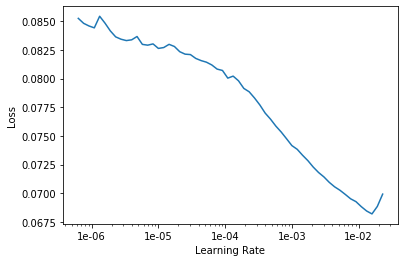

In [14]:
learn.recorder.plot()

epoch,train_loss,valid_loss,mse_loss,psnr,ssim,time
0,0.047345,0.041329,0.041329,13.841681,0.498595,25:19
1,0.046746,0.041053,0.041053,13.870840,0.494534,25:26
2,0.047062,0.040623,0.040623,13.916608,0.500092,25:25


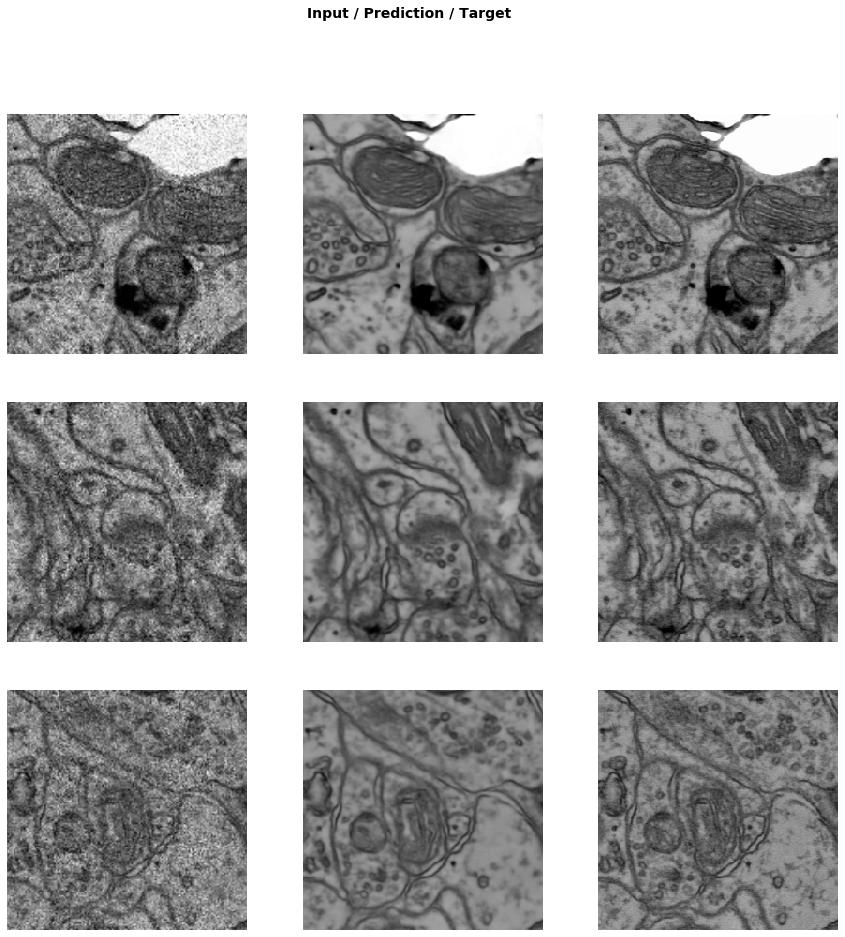

In [17]:
lr = 1e-3
do_fit(f'{nb_name}.2', slice(1e-4, lr), cycle_len=3)